# Control.jl

CME 257 HW# 3, Aaron Goldin, Julia 0.4.0

# Description

This package is a control systems design toolbox offers similar functionality as the Matlab control toolbox.

It has not been officially released so to add the package use:
```
Pkg.clone("https://github.com/JuliaControl/Control.jl.git")
``` 

This package is a bit buggy still. For instance, you must load PyPlot before loading Control, otherwise the plotting functions will not work. I'm not totally sure why this is, but I think has to do with how the plotting tools are exported. In the source the creator does this:
```
const __CONTROL_SOURCE_DIR__ = dirname(Base.source_path())
@require PyPlot include(joinpath(__CONTROL_SOURCE_DIR__, "plotting.jl"))
```
Also, the Interact package does not play well with the Control plotting features. (Trust me I tried.)

Otherwise, this package looks like it might become a viable alternative to Matlab's control toolbox.

For the example, we will look at some different feedback control designs for a simple motor model, and plot the step response, frequency response, and nyquist diagram.


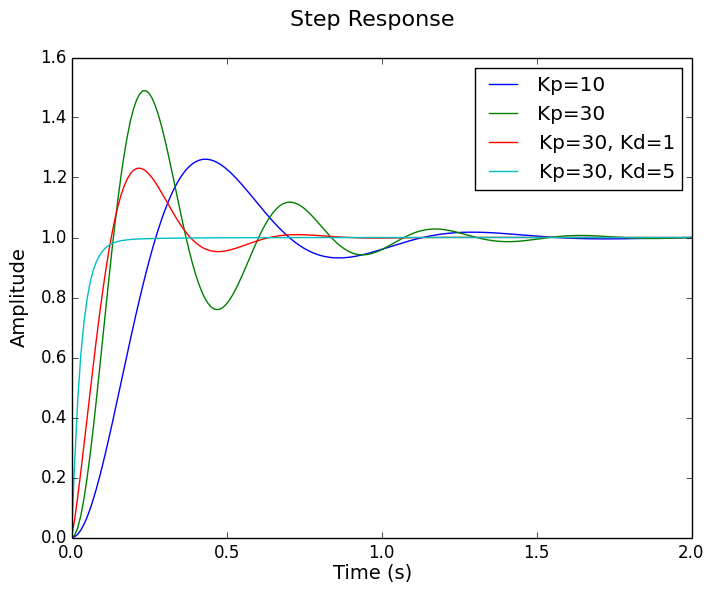

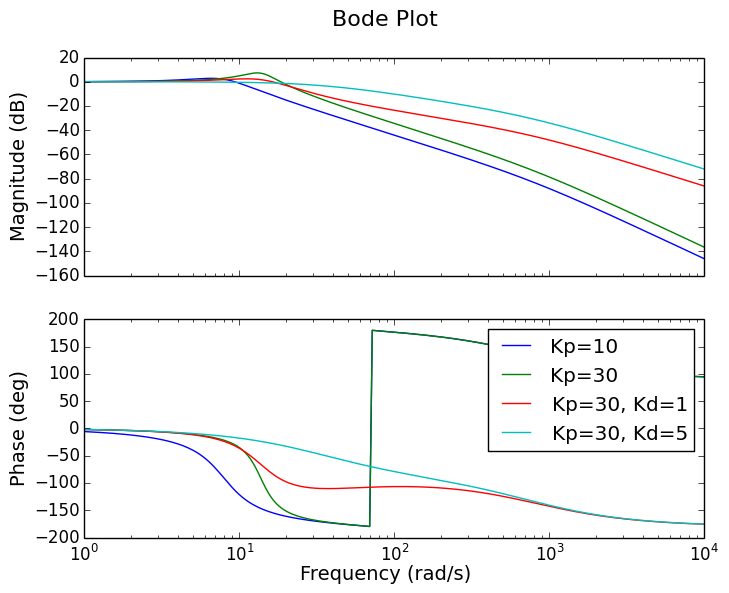

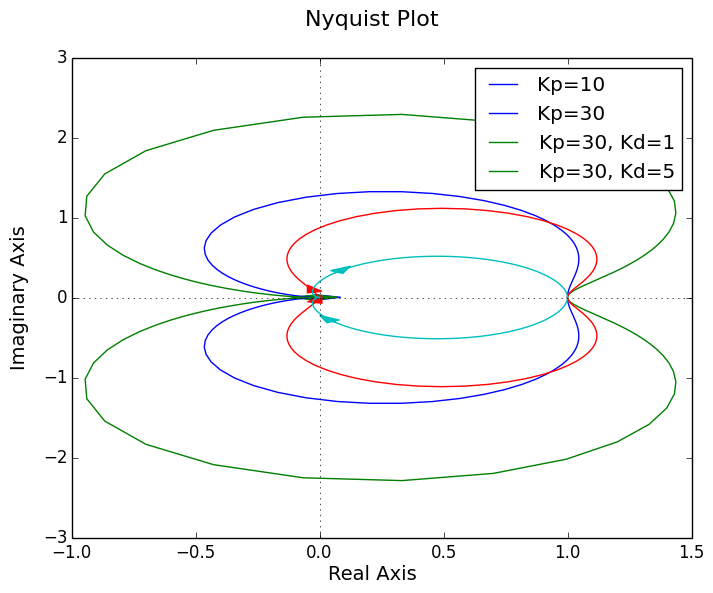

In [2]:
using PyPlot
using Control

# Motor parameters (using values from the package creator's example)
J = 2.0 # Moment of Inertia of the rotor [kg*m^2]

b = 0.04 # Viscous drag constant  [N*m*s]

K = 1.0  # Torque constant [N*m/Amp]  /  Voltage constant [V/rad/sec]  (these are the same in S.I. units)

R = 0.08 # Winding resistance  [Ohm]

L = 1e-4 # Winding inductance [H]

# Create the model transfer function
s = tf("s")

P = K/(s*((J*s + b)*(L*s + R) + K^2))  # Laplace transform of the plant model


#Create a Linear system type with an array of different PD controllers
CLs = LTISystem[C*P/(1 + C*P) for C = [(10), (30), (30+1*s), (30+5*s)]]; 

#Plot the step response of the 4 controllers
stepplot(CLs,[0.01, 0.01, 0.01, .01],2)
legend(["Kp=10", "Kp=30", "Kp=30, Kd=1", "Kp=30, Kd=5"]);

#Plot the frequency response of the 4 controllers
bodeplot(CLs)
legend(["Kp=10", "Kp=30", "Kp=30, Kd=1", "Kp=30, Kd=5"]);

#Plot the nyquist diagram of the 4 controllers
nyquistplot(CLs)
legend(["Kp=10", "Kp=30", "Kp=30, Kd=1", "Kp=30, Kd=5"]);